# Long Term Open Source Metric Analysis

# Hadoop Analysis

In [44]:
hadoop_versions = [
         "2.9.2", "2.9.1", "2.9.0","2.8.5", "2.8.4", "2.8.3","2.8.2", "2.8.1","2.8.0",
        "2.7.7","2.7.6","2.7.5","2.7.3","2.7.2","2.7.1","2.7.0","2.6.5", "2.6.4","2.6.3"
        ,"2.6.2","2.6.1","2.6.0","2.5.2","2.5.1","2.5.0","2.4.1","2.4.0","2.3.0"
        ,"3.3.0", "3.3.1", "3.3.2", "3.3.3", "3.3.4", "3.3.5","3.3.6"
       ,"3.2.0", "3.3.1", "3.2.2", "3.2.3", "3.2.4"
       ,"3.1.0","3.1.1","3.1.2","3.1.3","3.1.4"
       ,"3.0.0","3.0.1","3.0.2","3.0.3"
    ]


neededColumnsClass =['cbo','cboModified','fanin','fanout','wmc','dit','noc','lcom',
                     'lcom*','tcc','lcc', 'loc'
               ]


In [45]:
len(hadoop_versions)

49

In [46]:
import pandas as pd

classCkMetricsAllVersionsDfClass = pd.read_csv('DataSource/hadoop_AllCkMetricsAllVersionsClass.csv')

In [47]:
hadoopBugsAllDf = pd.read_csv('DataSource/hadoop_bugs_all.csv')
hadoopNewFeaturesAllDf = pd.read_csv('DataSource/hadoop_newFeature_all.csv')
hadoopImprovementsAllDf = pd.read_csv('DataSource/hadoop_improvements_all.csv')

In [48]:
cleanedCkMetricsAllVersionsDf = (classCkMetricsAllVersionsDfClass
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("Test")]
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("test")]
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("TEST")]
    .loc[~classCkMetricsAllVersionsDfClass['file'].str.contains("src/test/")]
) 

In [60]:
print("Filtrelenmiş Sınıf Sayısı:", cleanedCkMetricsAllVersionsDf.shape[0])
print("Versionlanmış hata sayısı:", hadoopBugsAllDf.shape[0])
print("Versionlanmış yeni özellik sayısı:", hadoopImprovementsAllDf.shape[0])
print("Versionlanmış geliştirme sayısı:", hadoopNewFeaturesAllDf.shape[0])


Filtrelenmiş Sınıf Sayısı: 445474
Versionlanmış hata sayısı: 21640
Versionlanmış yeni özellik sayısı: 3139
Versionlanmış geliştirme sayısı: 258
      Issue key  Issue id                                            Summary  \
0     HDFS-8435  12831219                      Support CreateFlag in WebHdfs   
1     HDFS-8432  12831099  Introduce a minimum compatible layout version ...   
2  HADOOP-11995  12830847  Make jetty version configurable from the maven...   
3  HADOOP-11984  12830349         Enable parallel JUnit tests in pre-commit.   
4  HADOOP-11971  12829954  Move test utilities for tracing from hadoop-hd...   

     Status Resolution          Created          Updated Affects Version/s  \
0  Resolved      Fixed  19/May/15 23:50  30/Aug/16 01:33             2.6.0   
1  Resolved      Fixed  19/May/15 17:50  23/Sep/20 14:11               NaN   
2  Resolved      Fixed  18/May/15 22:33  30/Aug/16 01:27               NaN   
3  Resolved      Fixed  15/May/15 23:41  30/Aug/16 01:27       

In [50]:
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].max()
locVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)['loc'].sum()


hadoopBugsGroupedDf = hadoopBugsAllDf.groupby(['AVersion']).count().reset_index()
hadoopImprovementsGroupedDf= hadoopImprovementsAllDf.groupby(['Fix Version/s']).count().reset_index()
hadoopNewFeaturesGroupedDf= hadoopNewFeaturesAllDf.groupby(['Fix Version/s']).count().reset_index()

hadoopBugsGroupedDf = hadoopBugsGroupedDf.rename(columns = {'AVersion': 'Version','Issue key': 'Count'})[['Version','Count']]
hadoopImprovementsGroupedDf = hadoopImprovementsGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'Count'})[['Version','Count']]
hadoopNewFeaturesGroupedDf = hadoopNewFeaturesGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'Count'})[['Version','Count']]

locVersions = pd.merge(locVersions, hadoopBugsGroupedDf,on="Version", how='inner')



In [52]:
meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))

locVersions['numericVersion'] = locVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))

In [61]:
mergedMeanBugCountsDf = pd.merge(meanCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedStdBugCountsDf = pd.merge(stdCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedMaxBugCountsDf = pd.merge(maxCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')

mergedMeanNewFeatureCountsDf = pd.merge(meanCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedStdNewFeatureCountsDf = pd.merge(stdCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedMaxNewFeatureCountsDf = pd.merge(maxCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')

mergedMeanImprovementCountsDf = pd.merge(meanCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedStdImprovementCountsDf = pd.merge(stdCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedMaxImprovementCountsDf = pd.merge(maxCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')

mergedMeanNewFeatureCountsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Version         43 non-null     object 
 1   cbo             43 non-null     float64
 2   cboModified     43 non-null     float64
 3   fanin           43 non-null     float64
 4   fanout          43 non-null     float64
 5   wmc             43 non-null     float64
 6   dit             43 non-null     float64
 7   noc             43 non-null     float64
 8   lcom            43 non-null     float64
 9   lcom*           43 non-null     float64
 10  tcc             43 non-null     float64
 11  lcc             43 non-null     float64
 12  loc             43 non-null     float64
 13  numericVersion  43 non-null     int64  
 14  Count           43 non-null     int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 5.2+ KB


        cbo  cboModified     fanin    fanout        wmc       dit       noc  \
0  6.735890    10.097112  3.361222  6.735890  13.390106  1.740372  0.229250   
1  6.836838    10.167905  3.331067  6.836838  13.595257  1.734545  0.236047   
2  6.837730    10.166258  3.328528  6.837730  13.605368  1.745859  0.234816   
3  6.856276    10.159537  3.303261  6.856276  13.787378  1.729070  0.237611   
4  6.819083    10.016484  3.197400  6.819083  13.776065  1.714152  0.233181   

        lcom     lcom*       tcc       lcc        loc  numericVersion  Count  
0  88.810757  0.300064  0.220363  0.293495  67.387616             230     16  
1  89.462767  0.300808  0.222078  0.296124  67.931225             240      3  
2  90.615951  0.299607  0.222036  0.296360  67.928681             250      7  
3  90.259777  0.301127  0.217079  0.291703  68.545814             260     19  
4  86.452426  0.300723  0.218608  0.293890  68.470919             270     26  
Maksimum Değer: 45
Index(['CBO', 'CBO*', 'FANIN', '

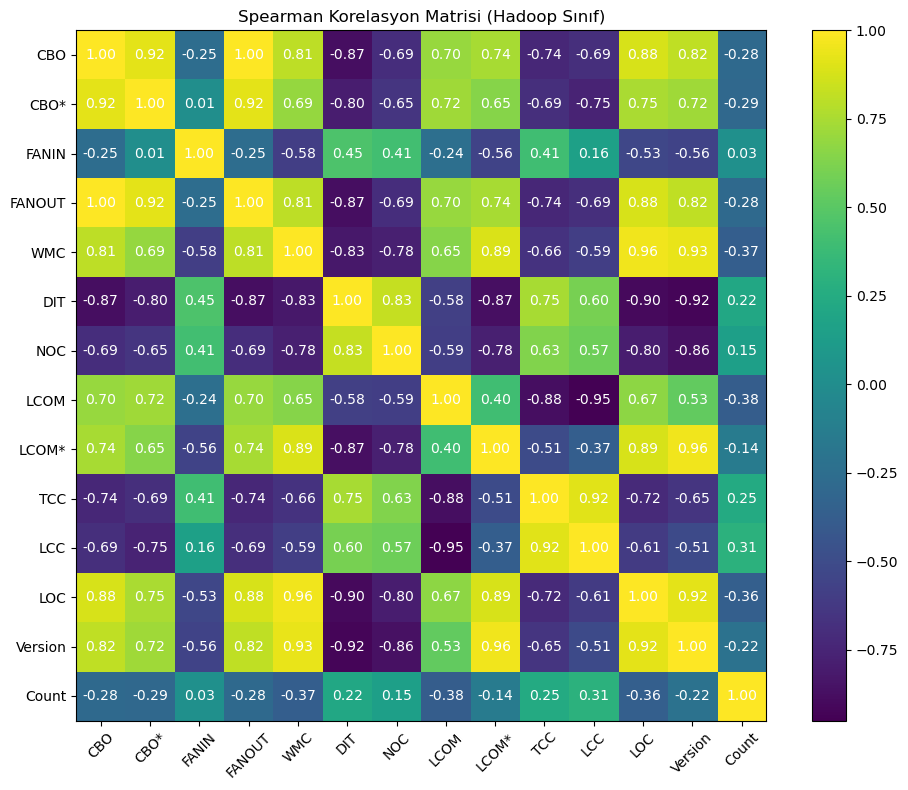

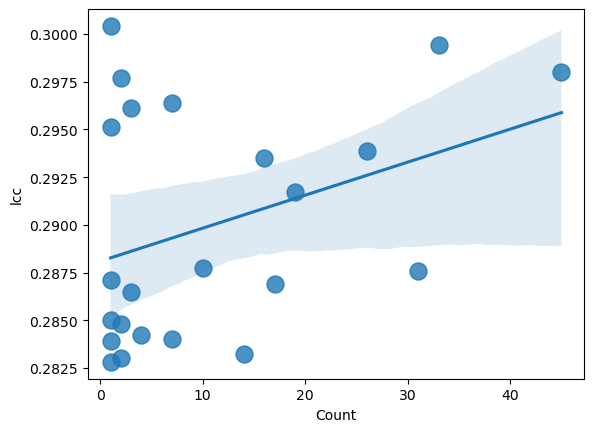

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


t_mergedMeanBugCountsDf = mergedMeanBugCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdBugCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxBugCountsDf.drop(columns=['Version'])

t_mergedMeanNewFeatureCountsDf = mergedMeanNewFeatureCountsDf.drop(columns=['Version'])
t_mergedStdNewFeatureCountsDf = mergedStdNewFeatureCountsDf.drop(columns=['Version'])
t_mergedMaxNewFeatureCountsDf = mergedMaxNewFeatureCountsDf.drop(columns=['Version'])

t_mergedMeanImprovementCountsDf = mergedMeanImprovementCountsDf.drop(columns=['Version'])
t_mergedStdImprovementCountsDf = mergedStdImprovementCountsDf.drop(columns=['Version'])
t_mergedMaxImprovementCountsDf = mergedMaxImprovementCountsDf.drop(columns=['Version'])



import numpy as np
import matplotlib.pyplot as plt

df = t_mergedMeanImprovementCountsDf
print(df.head())
max_value = df['Count'].max()

print("Maksimum Değer:", max_value)
correlation_matrix = df.corr(method='spearman')


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')


for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Spearman Korelasyon Matrisi (Hadoop Sınıf)')
correlation_matrix.columns = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Count']
correlation_matrix.index = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Count']
print(correlation_matrix.index)
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()



# Scatter plot ve korelasyon eğrisini çiz
sns.regplot(x='Count', y='lcc', data=df, scatter_kws={'s': 150})

# Grafiği göster
plt.show()

In [22]:
# BugDensity calculation
locVersions['Kloc'] = (locVersions['loc']/1000)
locVersions['BugDensity']= locVersions['Count']/locVersions['Kloc']

#Bugs per Weighted Method per Class
t_mergedMeanBugCountsDf['BugWeight'] = t_mergedMeanBugCountsDf['Count']/t_mergedMeanBugCountsDf['wmc']

print(t_mergedMeanBugCountsDf[['numericVersion','Count', 'wmc','BugWeight']])
#print(locVersions[['numericVersion','Count', 'Kloc','BugDensity']])


    numericVersion  Count        wmc  BugWeight
0              230    260  13.390106  19.417322
1              240    357  13.595257  26.259158
2              241    119  13.595862   8.752663
3              250    216  13.605368  15.876086
4              251     73  13.605675   5.365408
5              252     20  13.604202   1.470134
6              260    748  13.787378  54.252519
7              261     28  13.828298   2.024833
8              262     23  13.832959   1.662696
9              263      8  13.834270   0.578274
10             264     40  13.844891   2.889152
11             265     21  13.832843   1.518126
12             270    378  13.776065  27.438894
13             271    325  13.800857  23.549262
14             272    197  13.822861  14.251753
15             273    192  13.824234  13.888653
16             275     15  13.848489   1.083151
17             276      9  13.855533   0.649560
18             277     17  13.857256   1.226794
19             280    423  14.025070  30

ValueError: Length mismatch: Expected axis has 15 elements, new values have 14 elements

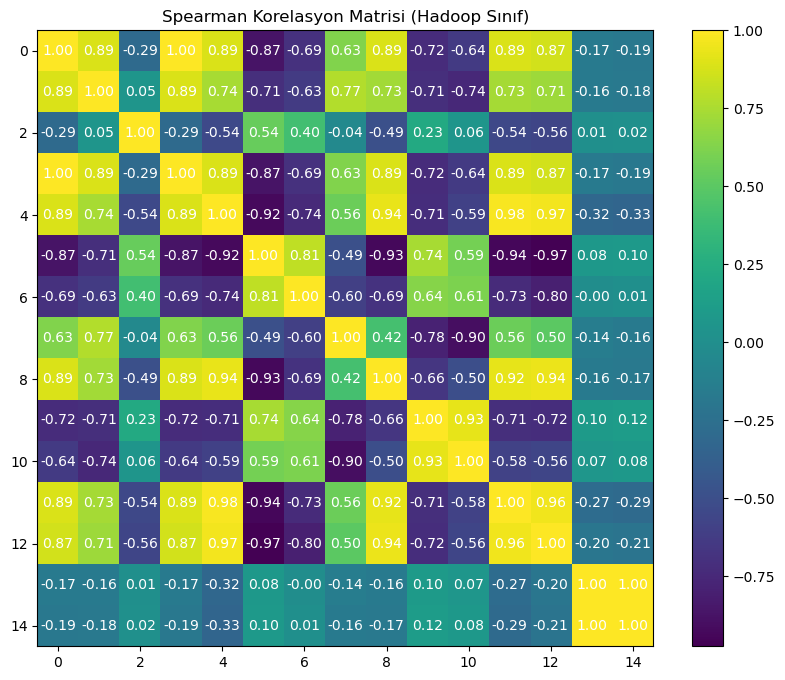

In [23]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr(method='spearman')


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')


for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Spearman Korelasyon Matrisi (Hadoop Sınıf)')
correlation_matrix.columns = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Hata Sayısı']
correlation_matrix.index = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Hata Sayısı']
print(correlation_matrix.index)
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr(method='pearson')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Pearson Korelasyon Matrisi (Hadoop Sınıf)')
correlation_matrix.columns = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Hata Sayısı']
correlation_matrix.index = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'Version', 'Hata Sayısı']
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CBO             48 non-null     int64  
 1   CBOMODIFIED     48 non-null     int64  
 2   FANIN           48 non-null     int64  
 3   FANOUT          48 non-null     int64  
 4   WMC             48 non-null     int64  
 5   DIT             48 non-null     int64  
 6   NOC             48 non-null     int64  
 7   LCOM            48 non-null     int64  
 8   LCOM*           48 non-null     float64
 9   TCC             48 non-null     float64
 10  LCC             48 non-null     float64
 11  LOC             48 non-null     int64  
 12  NUMERICVERSION  48 non-null     int64  
 13  COUNT           48 non-null     int64  
dtypes: float64(3), int64(11)
memory usage: 5.4 KB
Satır sayısı: 48, Sütun sayısı: 14
(48, 13)
(48,)
X_train boyutu (33, 13)
x_test boyutu (15, 13)
y_train boyutu (33, 1)
y_test

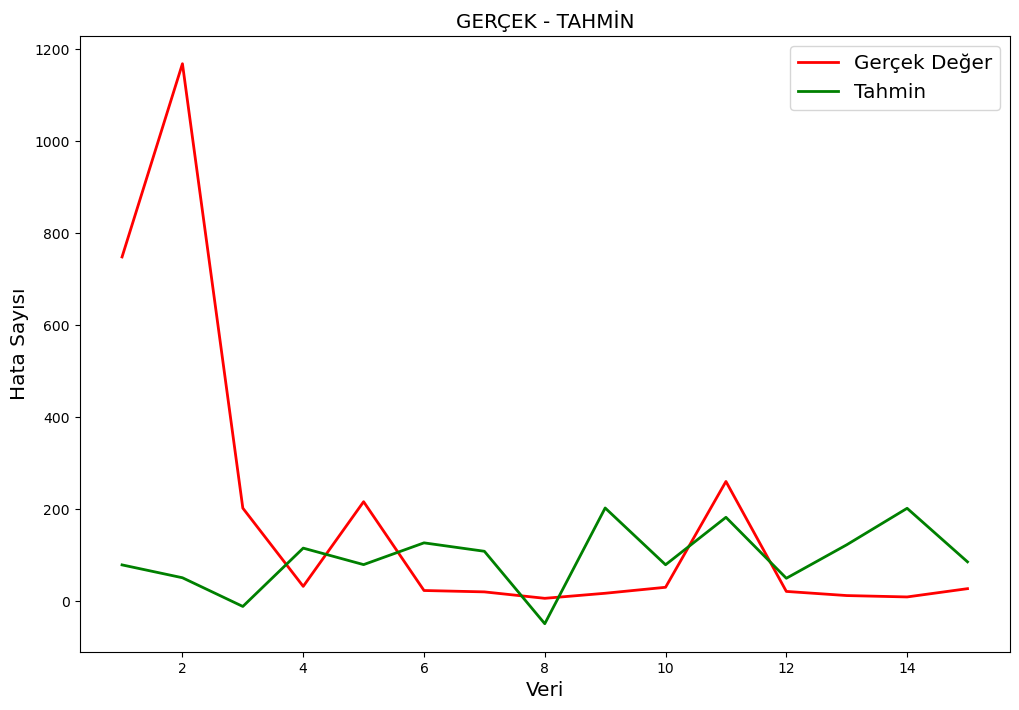

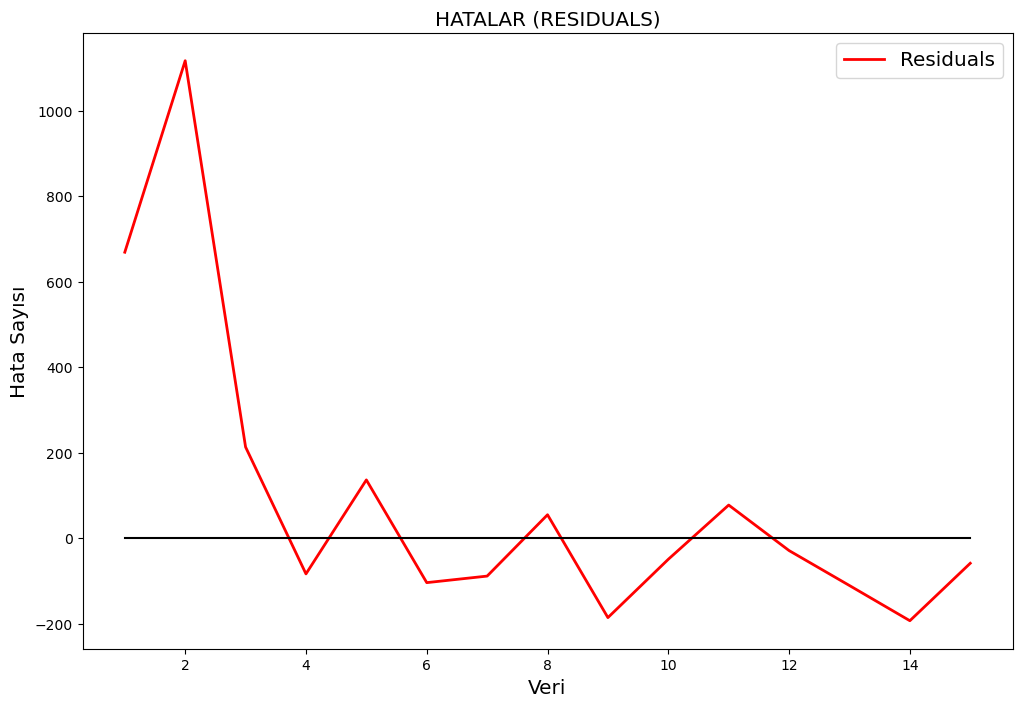

-20.5535203238564
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.749
Date:                Fri, 26 Jan 2024   Prob (F-statistic):              0.138
Time:                        13:45:54   Log-Likelihood:                -196.26
No. Observations:                  33   AIC:                             410.5
Df Residuals:                      24   BIC:                             424.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CBO               -2.3646 

In [42]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = t_mergedMaxBugCountsDf
df.info()
df.columns = df.columns.str.upper()



rows, columns = df.shape
print(f"Satır sayısı: {rows}, Sütun sayısı: {columns}")

lr= LinearRegression()

X = df[['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ]]
y = df['COUNT']

print(X.shape)
print(y.shape)

Y = y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100)
print("X_train boyutu", x_train.shape)
print("x_test boyutu", x_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

lr.fit(x_train, y_train)

katsayılar = pd.DataFrame(lr.coef_, columns = ['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ])

katsayılar

y_pred = lr.predict(x_test)


print (y_test)
print (y_pred)

#Çizdir
indexler = range(1,16)
#Gerçek değer
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label = 'Gerçek Değer', color = 'red', linewidth=2)

#Gerçek değer
ax.plot(indexler, y_pred, label ='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


#Hata Analizi
indexler = range(1,16)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label = 'Residuals', color ='red', linewidth=2)

ax.plot(indexler, np.zeros(15), color='black')

plt.title('HATALAR (RESIDUALS)', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


# Means Squared Error Hesaplama

r_2 = r2_score(y_test, y_pred)

print(r_2 *100)



import statsmodels.api as sm


X_train_ols = sm.add_constant(x_train)

(X_train_ols)
sm_model = sm.OLS(y_train, X_train_ols)

sonuc = sm_model.fit()

print(sonuc.summary())
with open('summary.csv', 'w') as fh:
    fh.write(sonuc.summary().as_csv())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CBO             48 non-null     float64
 1   CBOMODIFIED     48 non-null     float64
 2   FANIN           48 non-null     float64
 3   FANOUT          48 non-null     float64
 4   WMC             48 non-null     float64
 5   DIT             48 non-null     float64
 6   NOC             48 non-null     float64
 7   LCOM            48 non-null     float64
 8   LCOM*           48 non-null     float64
 9   TCC             48 non-null     float64
 10  LCC             48 non-null     float64
 11  LOC             48 non-null     float64
 12  NUMERICVERSION  48 non-null     int64  
 13  COUNT           48 non-null     int64  
dtypes: float64(12), int64(2)
memory usage: 5.4 KB
Satır sayısı: 48, Sütun sayısı: 14
(48, 13)
(48,)
X_train boyutu (33, 13)
x_test boyutu (15, 13)
y_train boyutu (33, 1)
y_test

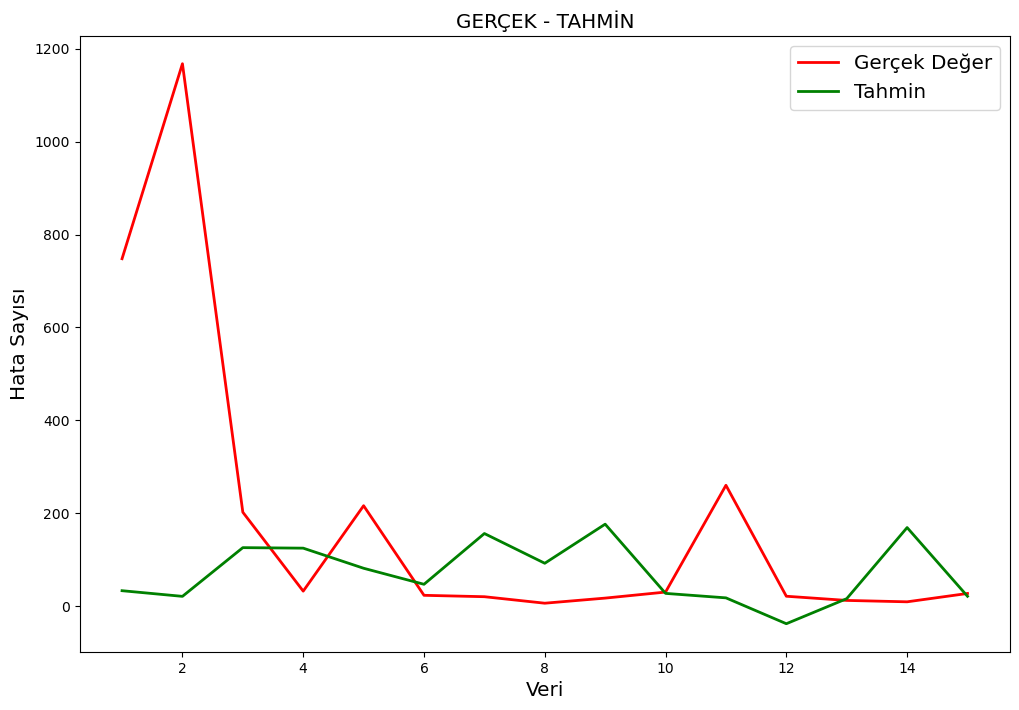

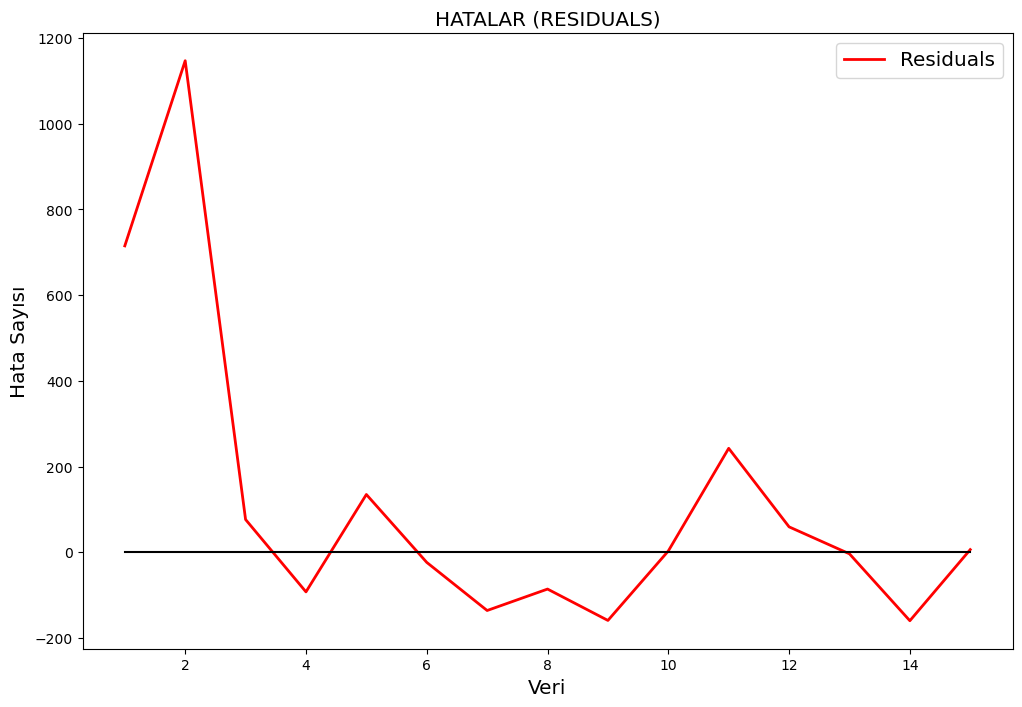

-27.861836863734247


In [15]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


mergedStdBugCountsDf.columns = mergedStdBugCountsDf.columns.str.upper()
t_mergedStdBugCountsDf = mergedStdBugCountsDf.drop(columns=['VERSION'])

t_mergedStdBugCountsDf.info()
rows, columns = t_mergedStdBugCountsDf.shape
print(f"Satır sayısı: {rows}, Sütun sayısı: {columns}")

lr= LinearRegression()

X = t_mergedStdBugCountsDf[['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ]].dropna()

y = t_mergedStdBugCountsDf['COUNT']

print(X.shape)
print(y.shape)

Y = y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100)
print("X_train boyutu", x_train.shape)
print("x_test boyutu", x_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

lr.fit(x_train, y_train)

katsayılar = pd.DataFrame(lr.coef_, columns = ['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ])

katsayılar

y_pred = lr.predict(x_test)


print (y_test)
print (y_pred)

#Çizdir
indexler = range(1,16)
#Gerçek değer
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label = 'Gerçek Değer', color = 'red', linewidth=2)

#Gerçek değer
ax.plot(indexler, y_pred, label ='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


#Hata Analizi
indexler = range(1,16)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label = 'Residuals', color ='red', linewidth=2)

ax.plot(indexler, np.zeros(15), color='black')

plt.title('HATALAR (RESIDUALS)', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


# Means Squared Error Hesaplama

r_2 = r2_score(y_test, y_pred)

print(r_2 *100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CBO             48 non-null     int64  
 1   CBOMODIFIED     48 non-null     int64  
 2   FANIN           48 non-null     int64  
 3   FANOUT          48 non-null     int64  
 4   WMC             48 non-null     int64  
 5   DIT             48 non-null     int64  
 6   NOC             48 non-null     int64  
 7   LCOM            48 non-null     int64  
 8   LCOM*           48 non-null     float64
 9   TCC             48 non-null     float64
 10  LCC             48 non-null     float64
 11  LOC             48 non-null     int64  
 12  NUMERICVERSION  48 non-null     int64  
 13  COUNT           48 non-null     int64  
dtypes: float64(3), int64(11)
memory usage: 5.4 KB
Satır sayısı: 48, Sütun sayısı: 14
(48, 13)
(48,)
X_train boyutu (33, 13)
x_test boyutu (15, 13)
y_train boyutu (33, 1)
y_test

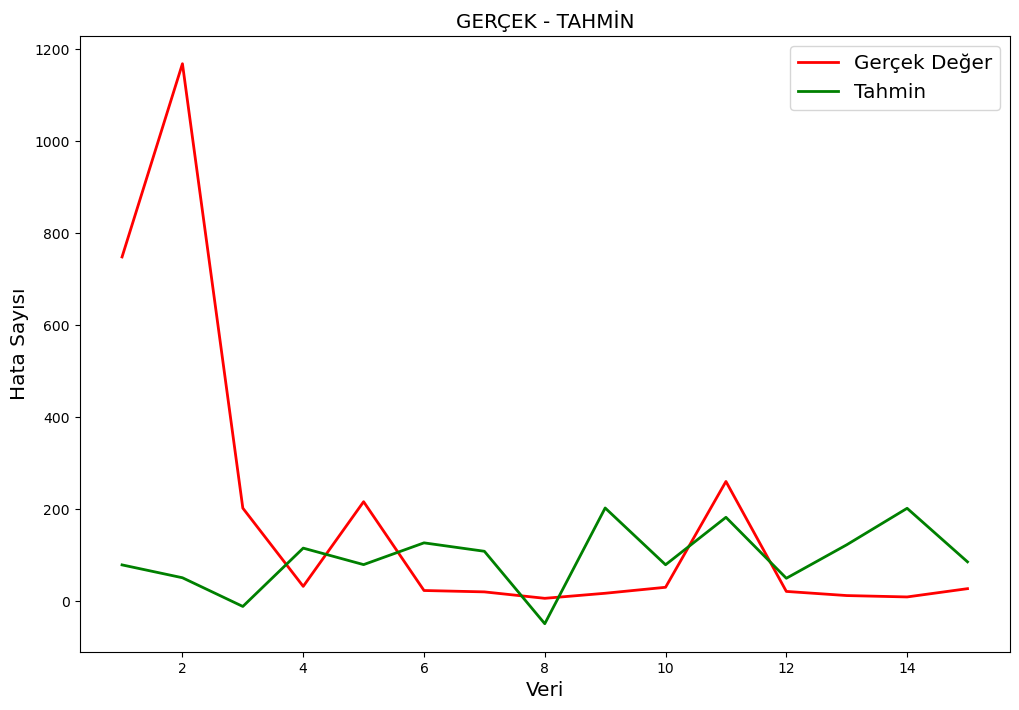

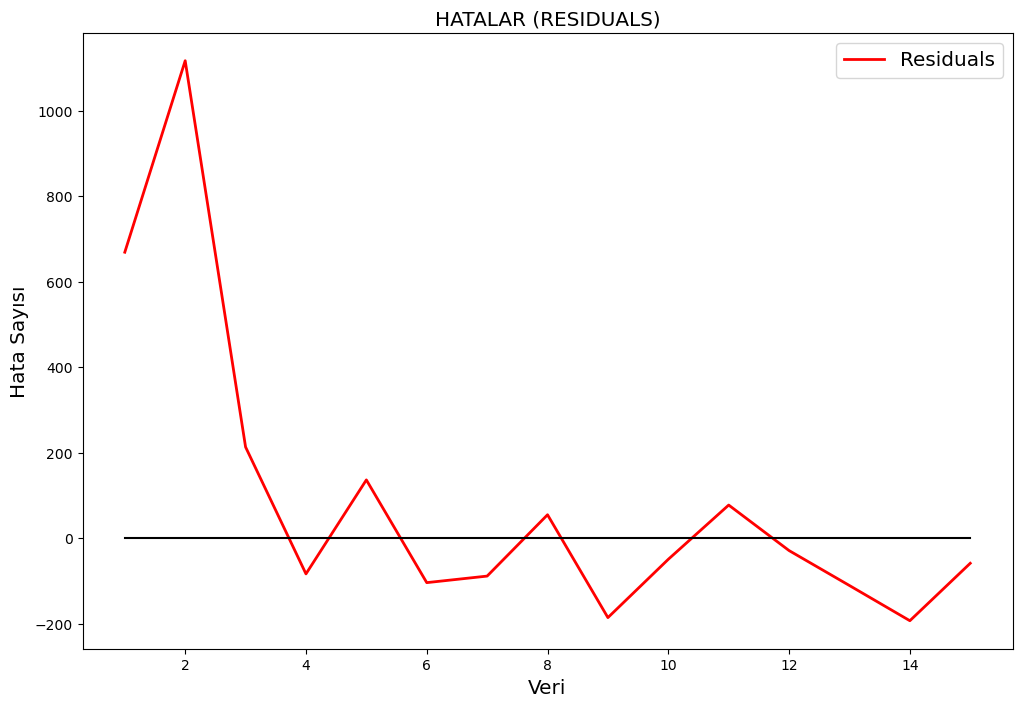

-20.5535203238564


In [16]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


mergedMaxBugCountsDf.columns = mergedMaxBugCountsDf.columns.str.upper()
t_mergedMaxBugCountsDf = mergedMaxBugCountsDf.drop(columns=['VERSION'])

t_mergedMaxBugCountsDf.info()
rows, columns = t_mergedMaxBugCountsDf.shape
print(f"Satır sayısı: {rows}, Sütun sayısı: {columns}")

lr= LinearRegression()

X = t_mergedMaxBugCountsDf[['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ]]
y = t_mergedMaxBugCountsDf['COUNT']

print(X.shape)
print(y.shape)

Y = y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100)
print("X_train boyutu", x_train.shape)
print("x_test boyutu", x_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

lr.fit(x_train, y_train)

katsayılar = pd.DataFrame(lr.coef_, columns = ['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ])

katsayılar

y_pred = lr.predict(x_test)


print (y_test)
print (y_pred)

#Çizdir
indexler = range(1,16)
#Gerçek değer
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label = 'Gerçek Değer', color = 'red', linewidth=2)

#Gerçek değer
ax.plot(indexler, y_pred, label ='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


#Hata Analizi
indexler = range(1,16)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label = 'Residuals', color ='red', linewidth=2)

ax.plot(indexler, np.zeros(15), color='black')

plt.title('HATALAR (RESIDUALS)', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


# Means Squared Error Hesaplama

r_2 = r2_score(y_test, y_pred)

print(r_2 *100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CBO             48 non-null     int64  
 1   CBOMODIFIED     48 non-null     int64  
 2   FANIN           48 non-null     int64  
 3   FANOUT          48 non-null     int64  
 4   WMC             48 non-null     int64  
 5   DIT             48 non-null     int64  
 6   NOC             48 non-null     int64  
 7   LCOM            48 non-null     int64  
 8   LCOM*           48 non-null     float64
 9   TCC             48 non-null     float64
 10  LCC             48 non-null     float64
 11  LOC             48 non-null     int64  
 12  NUMERICVERSION  48 non-null     int64  
 13  COUNT           48 non-null     int64  
dtypes: float64(3), int64(11)
memory usage: 5.4 KB
Satır sayısı: 48, Sütun sayısı: 14
(48, 13)
(48,)
X_train boyutu (33, 13)
x_test boyutu (15, 13)
y_train boyutu (33, 1)
y_test

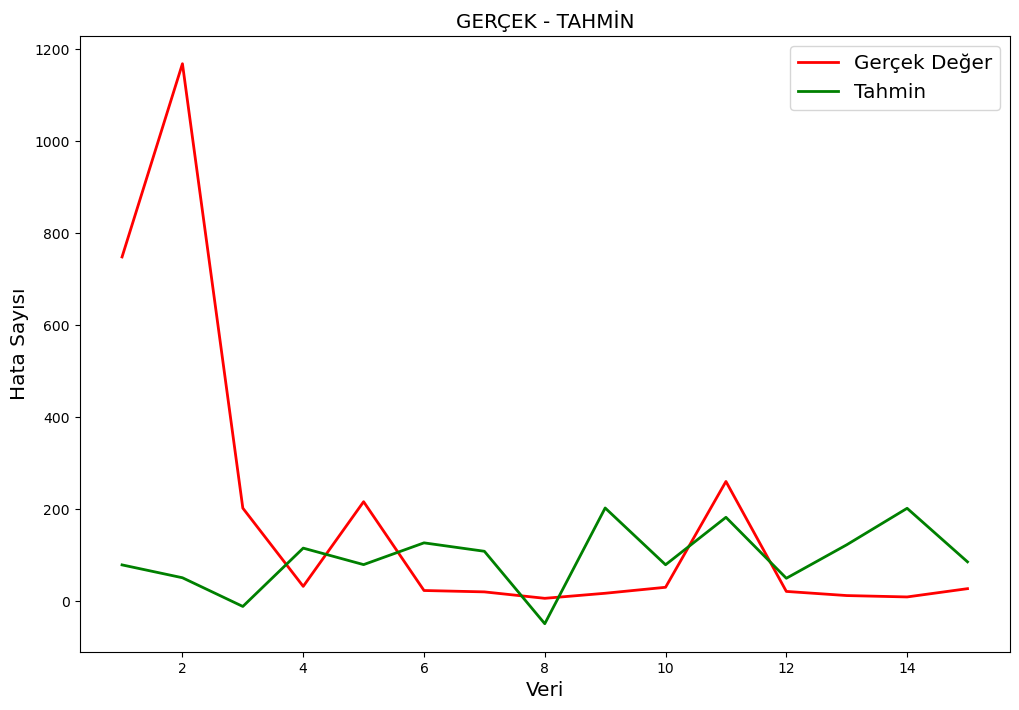

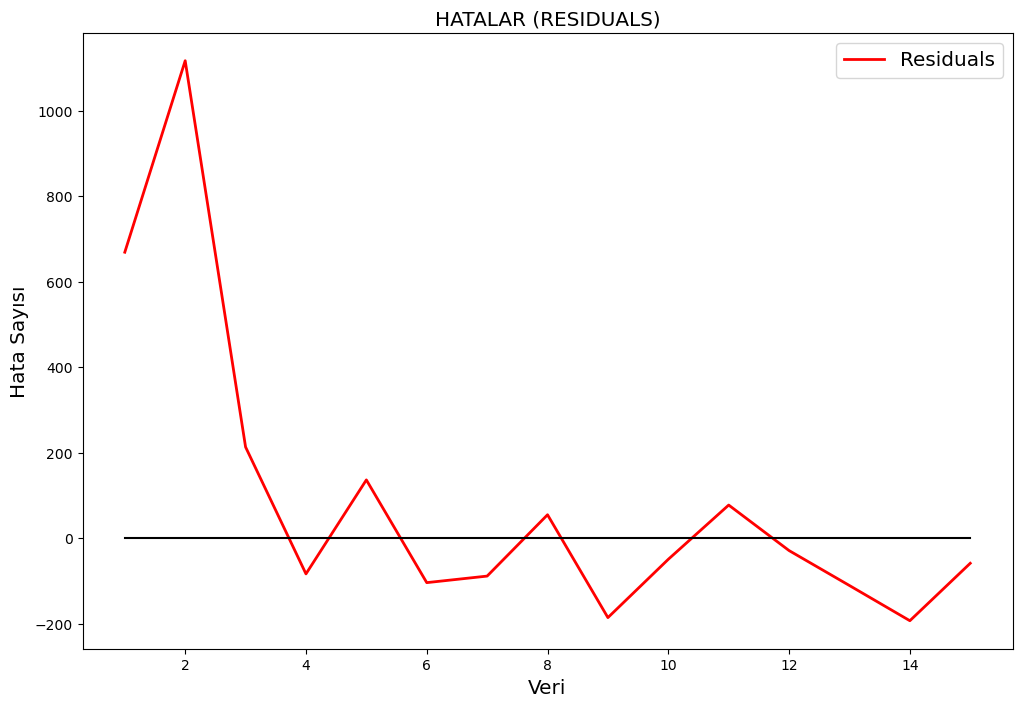

-20.5535203238564


In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


mergedMaxBugCountsDf.columns = mergedMaxBugCountsDf.columns.str.upper()
t_mergedMaxBugCountsDf = mergedMaxBugCountsDf.drop(columns=['VERSION'])

# t_mergedMeanNewFeatureCountsDf = mergedMeanNewFeatureCountsDf.drop(columns=['Version'])
# t_mergedStdNewFeatureCountsDf = mergedStdNewFeatureCountsDf.drop(columns=['Version'])
# t_mergedMaxNewFeatureCountsDf = mergedMaxNewFeatureCountsDf.drop(columns=['Version'])

# t_mergedMeanImprovementCountsDf = mergedMeanImprovementCountsDf.drop(columns=['Version'])
# t_mergedStdImprovementCountsDf = mergedStdImprovementCountsDf.drop(columns=['Version'])
# t_mergedMaxImprovementCountsDf = mergedMaxImprovementCountsDf.drop(columns=['Version'])

# df = t_mergedMeanImprovementCountsDf;

# X = df[neededColumnsClass]  # Independent variables
# y = df['Count']  # Dependent variable

# Create and fit the model
# model = sm.OLS(y, X).fit()

# Print the coefficients
# print(model.params)

t_mergedMaxBugCountsDf.info()
rows, columns = t_mergedMaxBugCountsDf.shape
print(f"Satır sayısı: {rows}, Sütun sayısı: {columns}")

lr= LinearRegression()

X = t_mergedMaxBugCountsDf[['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ]]
y = t_mergedMaxBugCountsDf['COUNT']

print(X.shape)
print(y.shape)

Y = y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100)
print("X_train boyutu", x_train.shape)
print("x_test boyutu", x_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

lr.fit(x_train, y_train)

katsayılar = pd.DataFrame(lr.coef_, columns = ['CBO', 'CBOMODIFIED', 'FANIN', 'FANOUT', 'WMC', 'DIT', 'NOC', 'LCOM',
       'LCOM*', 'TCC', 'LCC', 'LOC', 'NUMERICVERSION' ])

katsayılar

y_pred = lr.predict(x_test)


print (y_test)
print (y_pred)

#Çizdir
indexler = range(1,16)
#Gerçek değer
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label = 'Gerçek Değer', color = 'red', linewidth=2)

#Gerçek değer
ax.plot(indexler, y_pred, label ='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


#Hata Analizi
indexler = range(1,16)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label = 'Residuals', color ='red', linewidth=2)

ax.plot(indexler, np.zeros(15), color='black')

plt.title('HATALAR (RESIDUALS)', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


# Means Squared Error Hesaplama

r_2 = r2_score(y_test, y_pred)

print(r_2 *100)


# Analyse Bug Density

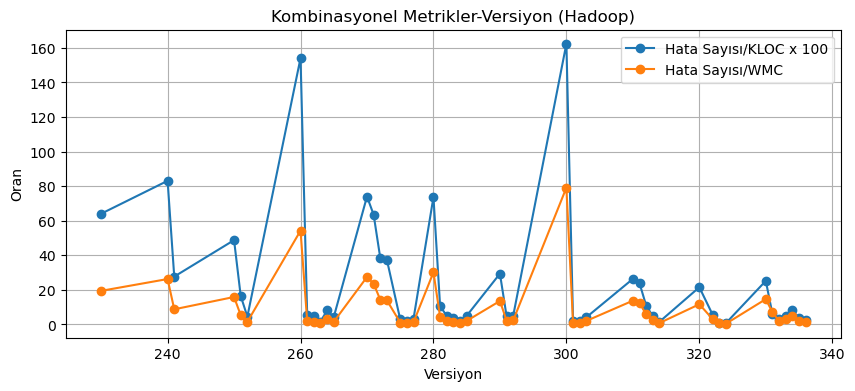

0     0.640484
1     0.830880
2     0.276664
3     0.487700
4     0.164824
5     0.045154
6     1.540648
7     0.057325
8     0.047065
9     0.016367
10    0.081730
11    0.042866
12    0.739827
13    0.634721
14    0.383600
15    0.372179
16    0.028882
17    0.017315
18    0.032702
19    0.737279
20    0.104577
21    0.050253
22    0.039791
23    0.020736
24    0.050076
25    0.293725
26    0.048006
27    0.050838
28    1.624085
29    0.022145
30    0.019377
31    0.041261
32    0.263337
33    0.238630
34    0.108954
35    0.048446
36    0.015201
37    0.215233
38    0.056435
39    0.011029
40    0.007342
41    0.252083
42    0.060159
43    0.030734
44    0.050083
45    0.080815
46    0.035394
47    0.026106
Name: BugDensity, dtype: float64


In [19]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4)) 

plt.plot(locVersions['numericVersion'], locVersions['BugDensity'] * 100, marker='o', linestyle='-', label='Hata Sayısı/KLOC x 100')
plt.plot(t_mergedMeanBugCountsDf['numericVersion'], t_mergedMeanBugCountsDf['BugWeight'], marker='o', linestyle='-', label='Hata Sayısı/WMC')



plt.ylabel('Oran')
plt.grid(True)

plt.xlabel('Versiyon')
plt.title('Kombinasyonel Metrikler-Versiyon (Hadoop)')
plt.legend()  
plt.show()

print(locVersions['BugDensity'])

In [14]:
from scipy import stats

veri = t_mergedMeanBugCountsDf['Count'].values

statistik, p_degeri = stats.shapiro(veri)

# Test istatistiği ve p değeri
print(f"Test İstatistiği: {statistik}, P Değeri: {p_degeri}")

# P değerinin anlamlılık seviyesiyle karşılaştırılması
anlamli_seviye = 0.05
if p_degeri > anlamli_seviye:
    print("Örnek veri normal dağılıma uymaktadır.")
else:
    print("Örnek veri normal dağılıma uymamaktadır.")

Test İstatistiği: 0.6031877994537354, P Değeri: 3.687761485071661e-10
Örnek veri normal dağılıma uymamaktadır.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cbo'], marker='o', linestyle='-', label='mean')
plt.ylabel('CBO')
plt.grid(True)

#plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cbo'], marker='o', linestyle='-', label='std')
#plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cbo'], marker='o', linestyle='-', label='max')
plt.xlabel('Version')
plt.title('CBO-Version (Hadoop-Class)  Version')
plt.legend()  
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cboModified'], marker='o', linestyle='-', label='mean')
plt.ylabel('Cbo')
plt.grid(True)

#plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cboModified'], marker='o', linestyle='-', label='std')
#plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cboModified'], marker='o', linestyle='-', label='max')
plt.xlabel('Version')
plt.title('Cbo Modified-Version (Hadoop-Class)')
plt.legend()  
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanin'], marker='o', linestyle='-', label='mean')
plt.ylabel('FAN-IN')
plt.grid(True)

#plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanin'], marker='o', linestyle='-', label='std')
#plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanin'], marker='o', linestyle='-', label='max')
plt.xlabel('Version')
plt.title('FAN-IN Modified-Version (Hadoop-Class)')
plt.legend()  
plt.show()

In [ ]:


plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Std')
plt.title('Std - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Std')
plt.title('Std - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Std')
plt.title('Std - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Std')
plt.title('Std - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Std')
plt.title('Std - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Std')
plt.title('Std - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcom'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom Std')
plt.title('Std - Changes of lcom')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcom*'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom* Std')
plt.title('Std - Changes of lcom*')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Std')
plt.title('Std - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Std')
plt.title('Std - Changes of lcc')
plt.grid(True)
plt.show()

In [1]:


plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Mean')
plt.title('Mean - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Mean')
plt.title('Mean - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['wmc'], marker='o', 
         label='mean', linestyle='-')
plt.xlabel('Version')
plt.ylabel('WMC')
plt.title('WMC-Version (Hadoop)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Mean')
plt.title('Mean - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Mean')
plt.title('Mean - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcom'], 
         marker='o', linestyle='-',label='mean')
plt.xlabel('Version')
plt.ylabel('Lcom')
plt.title('Lcom - Version (Hadoop)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcom*'], 
         marker='o', linestyle='-',label='mean')
plt.xlabel('Version')
plt.ylabel('lcom* Mean')
plt.title('Mean - Changes of lcom*')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Mean')
plt.title('Mean - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Mean')
plt.title('Mean - Changes of lcc')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:


plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Max')
plt.title('Max - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Max')
plt.title('Max - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Max')
plt.title('Max - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Max')
plt.title('Max - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Max')
plt.title('Max - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Max')
plt.title('Max - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcom'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom Max')
plt.title('Max - Changes of lcom')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcom*'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom* Max')
plt.title('Max - Changes of lcom*')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Max')
plt.title('Max - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Max')
plt.title('Max - Changes of lcc')
plt.grid(True)
plt.show()

Lets use neural network for fault prediction